# Level 16: let me get this straight

[http://www.pythonchallenge.com/pc/return/mozart.html](http://www.pythonchallenge.com/pc/return/mozart.html)

## 線索

畫面上只有一張 640x480 的圖片，黑白交雜的花紋中穿插著一些洋紅色的斑點。

查看 HTML Source，沒有任何其他線索。

## 嘗試

先把圖片抓下來看看

In [1]:
from PIL import Image
import urllib.request

baseurl = "http://www.pythonchallenge.com/pc/return/"

pwmgr = urllib.request.HTTPPasswordMgrWithDefaultRealm()
pwmgr.add_password(None, baseurl, "huge", "file")
auth_handler = urllib.request.HTTPBasicAuthHandler(pwmgr)
opener = urllib.request.build_opener(auth_handler)
urllib.request.install_opener(opener)

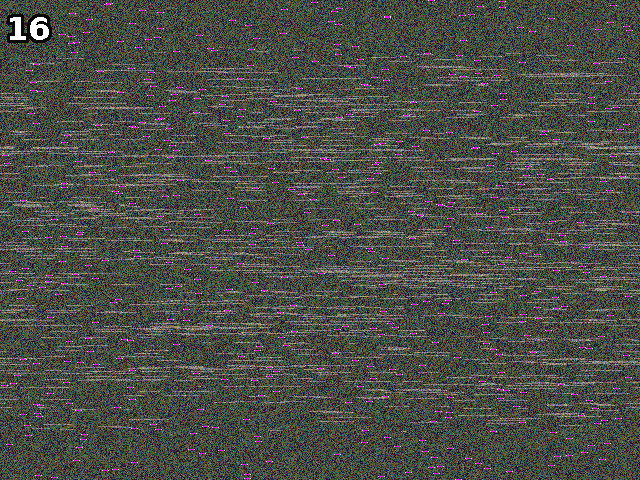

In [2]:
url = "http://www.pythonchallenge.com/pc/return/mozart.gif"

data = urllib.request.urlopen(url)
im = Image.open(data).convert("RGB")
display(im)

確認一下每一行的洋紅色的像素數量，發現每一行都是 5 個

In [3]:
width, height = im.size

for y in range(height):
    n = 0
    for x in range(width):
        if im.getpixel((x, y)) == (255, 0, 255):
            n += 1
    print(y, n)

0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
8 5
9 5
10 5
11 5
12 5
13 5
14 5
15 5
16 5
17 5
18 5
19 5
20 5
21 5
22 5
23 5
24 5
25 5
26 5
27 5
28 5
29 5
30 5
31 5
32 5
33 5
34 5
35 5
36 5
37 5
38 5
39 5
40 5
41 5
42 5
43 5
44 5
45 5
46 5
47 5
48 5
49 5
50 5
51 5
52 5
53 5
54 5
55 5
56 5
57 5
58 5
59 5
60 5
61 5
62 5
63 5
64 5
65 5
66 5
67 5
68 5
69 5
70 5
71 5
72 5
73 5
74 5
75 5
76 5
77 5
78 5
79 5
80 5
81 5
82 5
83 5
84 5
85 5
86 5
87 5
88 5
89 5
90 5
91 5
92 5
93 5
94 5
95 5
96 5
97 5
98 5
99 5
100 5
101 5
102 5
103 5
104 5
105 5
106 5
107 5
108 5
109 5
110 5
111 5
112 5
113 5
114 5
115 5
116 5
117 5
118 5
119 5
120 5
121 5
122 5
123 5
124 5
125 5
126 5
127 5
128 5
129 5
130 5
131 5
132 5
133 5
134 5
135 5
136 5
137 5
138 5
139 5
140 5
141 5
142 5
143 5
144 5
145 5
146 5
147 5
148 5
149 5
150 5
151 5
152 5
153 5
154 5
155 5
156 5
157 5
158 5
159 5
160 5
161 5
162 5
163 5
164 5
165 5
166 5
167 5
168 5
169 5
170 5
171 5
172 5
173 5
174 5
175 5
176 5
177 5
178 5
179 5
180 5
181 5
182 5
183 5
184 5


這關的標題是 let me get this straight  
或許將每一行用洋紅色的標記來對齊會是個好主意？來試試看：  
因為洋紅色標記有可能在某一行的最左或最右，所以我先設定新的圖片寬度是原始圖片的兩倍寬，讓洋紅色標記可以定位在最中間，如此圖像應該會分成左右兩邊

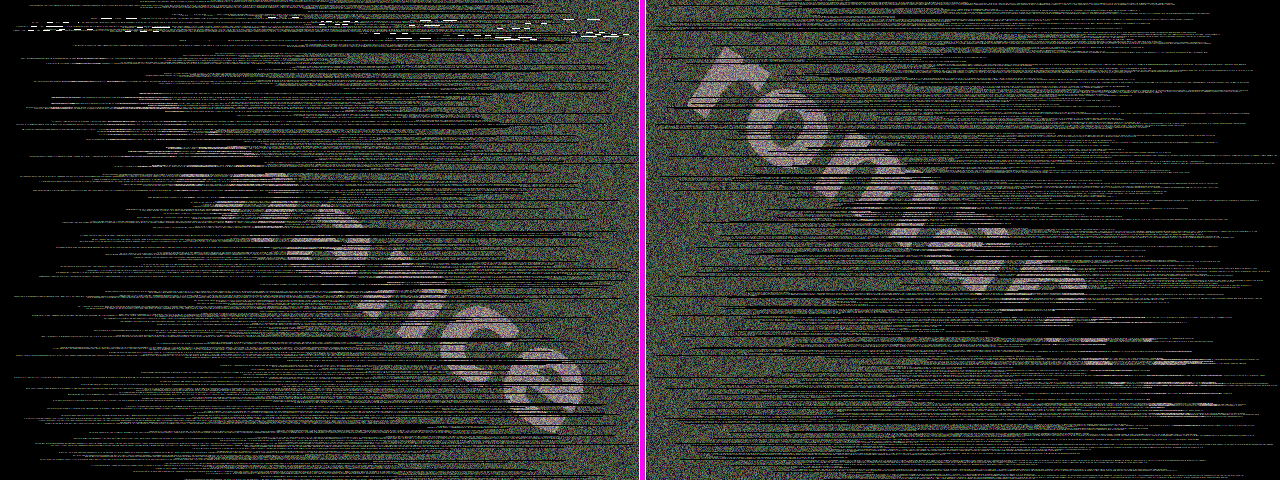

In [4]:
im_new = Image.new("RGB", (1280, 480), "black")

width, height = im.size

for y in range(height):
    shift = None
    for x in range(width):
        if im.getpixel((x, y)) == (255, 0, 255) and shift is None:
            shift = 640 - x
            break
    for x in range(width):
        im_new.putpixel((shift + x, y), im.getpixel((x, y)))

display(im_new)

以洋紅色的像素作為標記來對齊後，左右兩邊似乎是可以嵌合在一起的？或許我應該將左右兩邊的像素重新排列，讓洋紅色的像素都排到最左邊？

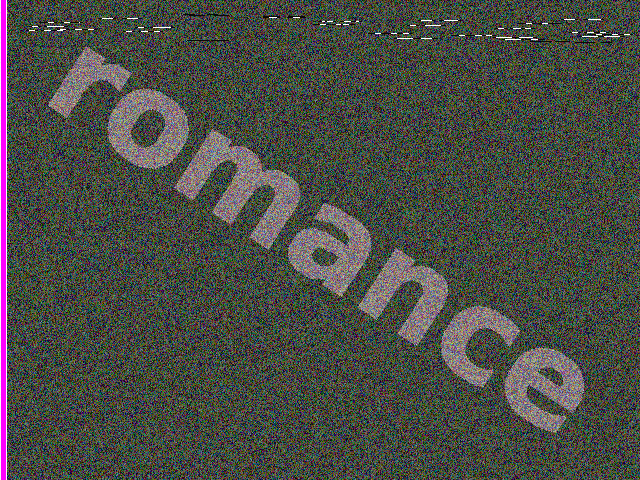

In [6]:
im_new = Image.new("RGB", (640, 480), "black")

width, height = im.size

for y in range(height):
    shift = None
    for x in range(width):
        if im.getpixel((x, y)) == (255, 0, 255) and shift is None:
            shift = -x + 1
            break
    for x in range(width):
        new_x = (x + shift + 640) % 640
        im_new.putpixel((new_x, y), im.getpixel((x, y)))

display(im_new)

其實在左右嵌合前就已經可以看得出來了，不過嵌合後就更明顯了

讓我們試試 ```http://www.pythonchallenge.com/pc/return/romance.html``` ，沒問題，順利進入下一關囉